In [2]:
%run ../../main.py
%matplotlib inline

In [4]:
from cba import CBA, generateCARs



import matplotlib.pyplot as plt
import matplotlib.patches as patches

from itertools import combinations

import itertools
import pandas as pd
import numpy
import re

movies = pd.read_csv("../data/movies_tomatoes.csv", sep=";")
movies_discr = movies.copy(True)



budget_bins = range(0, 350, 50)
budget_bins_names = [ "<{0};{1})".format(i, i + 50) for i in budget_bins[:-1] ]

celebrities_bins = range(0, 110, 10)
celebrities_bins_names = [ "<{0};{1})".format(i, i + 2) for i in celebrities_bins[:-1] ]

movies_discr['estimated-budget'] = pd.cut(movies['estimated-budget'], budget_bins, labels=budget_bins_names)
movies_discr['rotten_tomatoes'] = pd.cut(movies['rotten_tomatoes'], celebrities_bins, labels=celebrities_bins_names)

transactionDB = TransactionDB.from_pandasdf(movies_discr)

rules = generateCARs(transactionDB, support=-1, confidence=50)

movies_vals = movies.get_values()

rules_fig = plt.figure()

x = range(0, 350, 50)
y = range(0, 110, 10)


x_points = list(map(lambda n: n[0], movies_vals))
y_points = list(map(lambda n: n[1], movies_vals))
data_class = list(movies['class'])
appearance = {
    'box-office-bomb': ('brown', "o"),
    'main-stream-hit': ('blue', "o"),
    'critical-success': ('green', "o")
}
rule_appearance = {
    'box-office-bomb': 'tan',
    'main-stream-hit': 'aqua',
    'critical-success': 'lightgreen'
}

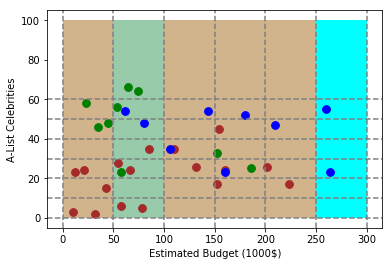

In [5]:
def plot_rule(rule, plt):
    interval_regex = "<(\d+);(\d+)\)"
    
    lower_y = 0
    area_y = celebrities_bins[-1]
    
    lower_x = 0
    area_x = budget_bins[-1]
    
    
    
    
    if len(rule.antecedent) != 0:
        if rule.antecedent[0][0] == "a-list-celebrities":
            y = rule.antecedent[0]
            y_boundaries = re.search(interval_regex, y[1])
            lower_y = float(y_boundaries.group(1))
            upper_y = float(y_boundaries.group(2))
            area_y = upper_y - lower_y

            axis = plt.gca()
        else:
            x = rule.antecedent[0]
            x_boundaries = re.search(interval_regex, x[1])
            lower_x = float(x_boundaries.group(1))
            upper_x = float(x_boundaries.group(2))
            area_x = upper_x - lower_x
        
    if len(rule.antecedent) > 1:
        if rule.antecedent[1][0] == "a-list-celebrities":
            y = rule.antecedent[1]
            y_boundaries = re.search(interval_regex, y[1])
            lower_y = float(y_boundaries.group(1))
            upper_y = float(y_boundaries.group(2))
            area_y = upper_y - lower_y

            axis = plt.gca()
        else:
            x = rule.antecedent[1]
            x_boundaries = re.search(interval_regex, x[1])
            lower_x = float(x_boundaries.group(1))
            upper_x = float(x_boundaries.group(2))
            area_x = upper_x - lower_x
            
    
    axis = plt.gca()

    class_name = rule.consequent[1]
    
    axis.add_patch(
       patches.Rectangle((lower_x, lower_y), area_x, area_y, zorder=-2, facecolor=rule_appearance[class_name], alpha=rule.confidence)
    )

 

for r in rules:
    plot_rule(r, plt)

# data cases
for i in range(len(x_points)):
    plt.scatter(x_points[i], y_points[i], marker=appearance[data_class[i]][1], color=appearance[data_class[i]][0], s=60)


# rule boundary lines
for i, n in enumerate(x):
    plt.axhline(y=y[i], color = "grey", linestyle="dashed")
    plt.axvline(x=x[i], color = "grey", linestyle="dashed")

    
    
plt.xlabel('Estimated Budget (1000$)')
plt.ylabel('A-List Celebrities')



plt.show()